---

# Ensembles of models

In this assignment, we will consider the application of some classical and well-proven ensemble algorithms. We will demonstrate the work of these algorithms using electricity consumption dataset.

# Dataset description

**Author**: M. Harries, J. Gama, A. Bifet  
**Source**: [Joao Gama](http://www.inescporto.pt/~jgama/ales/ales_5.html) - 2009  
**Please cite**: None  

**Electricity** is a widely used dataset described by M. Harries and analyzed by J. Gama (see papers below). This data was collected from the Australian New South Wales Electricity Market. In this market, prices are not fixed and are affected by demand and supply of the market. They are set every five minutes. Electricity transfers to/from the neighboring state of Victoria were done to alleviate fluctuations.

The dataset (originally named ELEC2) contains 45,312 instances dated from 7 May 1996 to 5 December 1998. Each example of the dataset refers to a period of 30 minutes, i.e. there are 48 instances for each time period of one day. Each example on the dataset has 5 fields, the day of week, the time stamp, the New South Wales electricity demand, the Victoria electricity demand, the scheduled electricity transfer between states and the class label. The class label identifies the change of the price (UP or DOWN) in New South Wales relative to a moving average of the last 24 hours (and removes the impact of longer term price trends). 

The data was normalized by A. Bifet.

### Attribute information  
* Date: date between 7 May 1996 to 5 December 1998. Here normalized between 0 and 1
* Day: day of the week (1-7)
* Period: time of the measurement (1-48) in half hour intervals over 24 hours. Here normalized between 0 and 1
* NSWprice: New South Wales electricity price, normalized between 0 and 1
* NSWdemand: New South Wales electricity demand, normalized between 0 and 1
* VICprice: Victoria electricity price, normalized between 0 and 1
* VICdemand: Victoria electricity demand, normalized between 0 and 1
* transfer: scheduled electricity transfer between both states, normalized between 0 and 1

### Relevant papers  
M. Harries. Splice-2 comparative evaluation: Electricity pricing. Technical report, The University of South Wales, 1999.  
J. Gama, P. Medas, G. Castillo, and P. Rodrigues. Learning with drift detection. In SBIA Brazilian Symposium on Artificial Intelligence, pages 286–295, 2004.

# Exploratory data analysis

Read the dataset into a dataframe

In [1]:
# < ENTER YOUR CODE HERE >
import pandas as pd

data = pd.read_csv('electricity_train.csv')
data.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.425556,6,0.723404,0.076258,0.311366,0.003467,0.422915,0.414912,1
1,0.867351,7,0.808511,0.028131,0.299018,0.001838,0.325738,0.832018,0
2,0.031680,1,0.723404,0.055242,0.398691,0.003467,0.422915,0.414912,0
3,0.867793,3,1.000000,0.028822,0.396162,0.001014,0.394873,0.639474,0
4,0.880536,4,0.978723,0.040741,0.468908,0.002655,0.425427,0.630702,1


Use the <code>.describe()</code> method to explore the dataset "from a bird's eye view".

In [2]:
# < ENTER YOUR CODE HERE >
round(data.describe(),3)

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
count,36249.000,36249.000,36249.000,36249.000,36249.000,36249.000,36249.000,36249.000,36249.000
mean,0.498,4.007,0.501,0.058,0.426,0.003,0.423,0.500,0.425
std,0.340,1.994,0.295,0.039,0.163,0.010,0.121,0.153,0.494
min,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.032,2.000,0.255,0.035,0.310,0.002,0.373,0.415,0.000
50%,0.456,4.000,0.511,0.049,0.444,0.003,0.423,0.415,0.000
75%,0.880,6.000,0.766,0.074,0.537,0.003,0.469,0.605,1.000
max,1.000,7.000,1.000,1.000,0.981,1.000,1.000,0.959,1.000


Make sure there are no missing values. It makes sense to check the balance of classes. Enter the proportion of elements of the class $1$.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36249 entries, 0 to 36248
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       36249 non-null  float64
 1   day        36249 non-null  int64  
 2   period     36249 non-null  float64
 3   nswprice   36249 non-null  float64
 4   nswdemand  36249 non-null  float64
 5   vicprice   36249 non-null  float64
 6   vicdemand  36249 non-null  float64
 7   transfer   36249 non-null  float64
 8   class      36249 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 2.5 MB


In [4]:
# < ENTER YOUR CODE HERE >
round(data['class'].value_counts(normalize=True), 3)

class
0    0.575
1    0.425
Name: proportion, dtype: float64

Construct a correlation matrix. Identify the pair of most correlated features.

<Axes: >

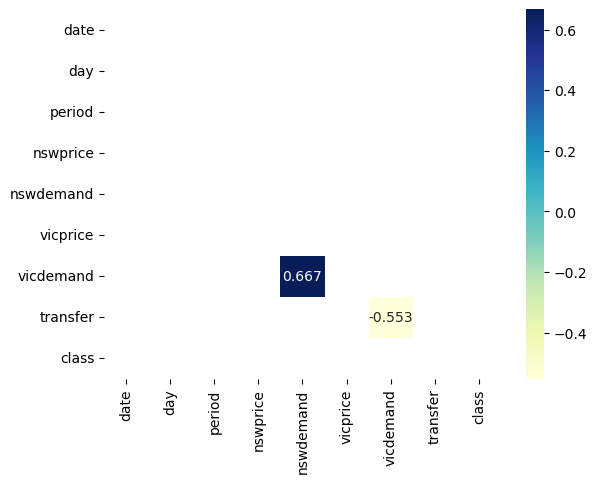

In [5]:
# < ENTER YOUR CODE HERE >
import seaborn as sns
import numpy as np
corr = data.corr()
sns.heatmap(corr.mask(np.abs(corr) <= 0.5), cmap="YlGnBu", fmt='.3g' ,
            mask = np.triu(data.corr()) , annot=True)

Construct histograms of the distributions of the features.

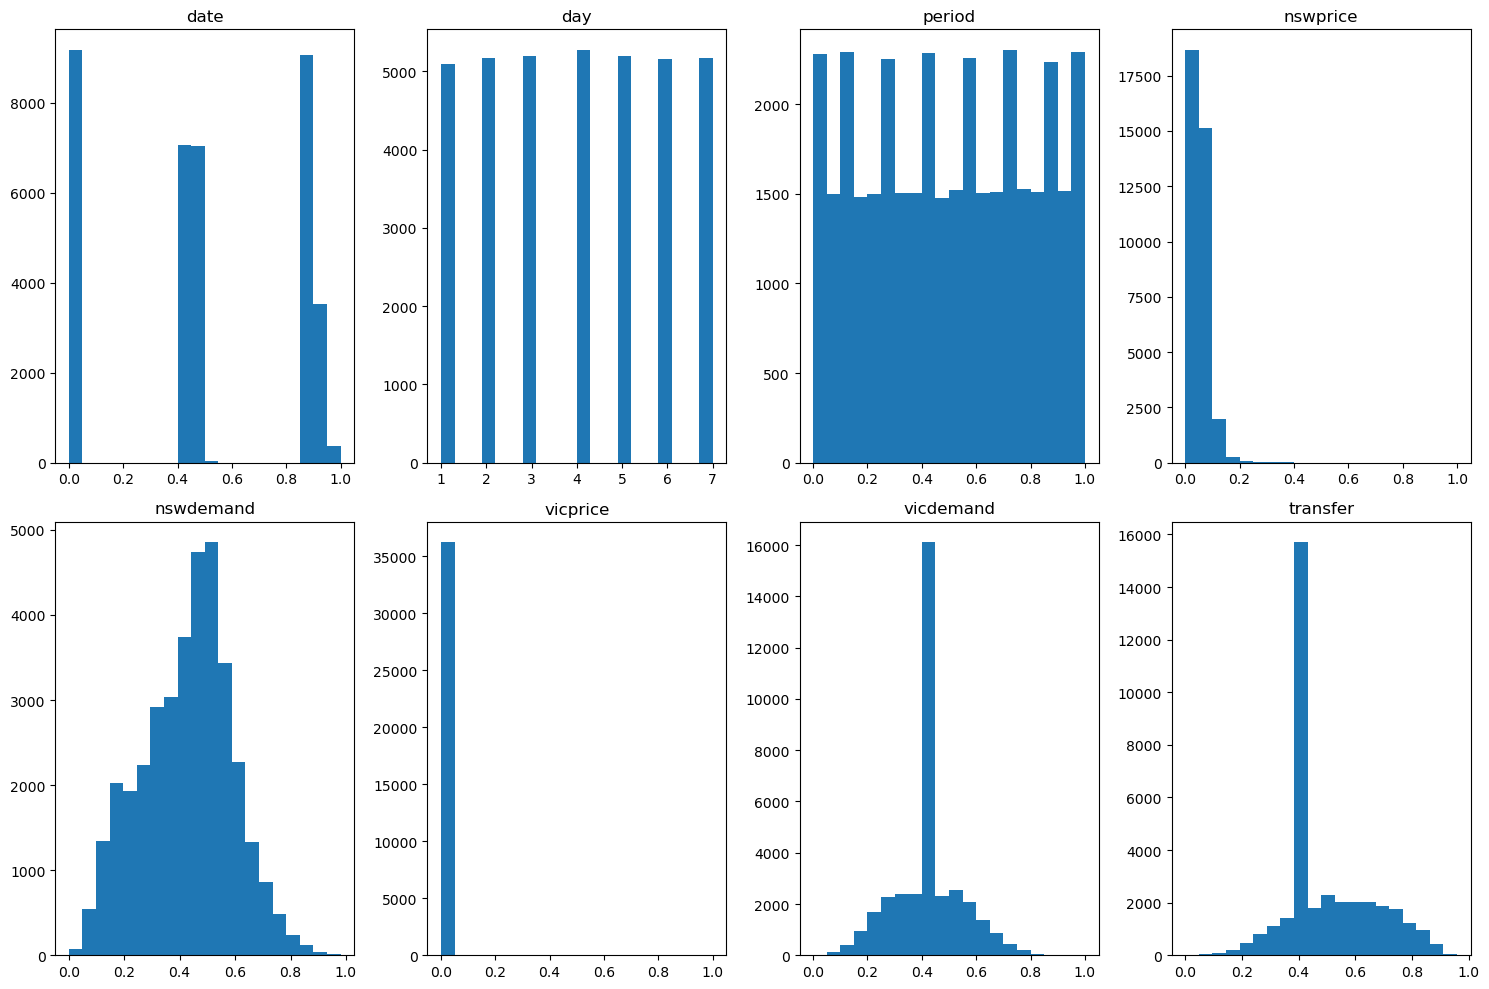

In [6]:
# < ENTER YOUR CODE HERE >
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

for i, ax in enumerate(axes.flatten()):
    ax.hist(data.iloc[:, i], bins=20)
    ax.set_title(data.columns[i])
plt.tight_layout()
plt.show()

From the resulting illustrations, we can see that there is probably some periodicity in the data, as expected. Moreover, it seems that the missing values and outlier processing has already been done for us.

Use <code>train_test_split</code> to split the resulting dataset into training and test samples with the parameters specified in your individual assignment.

In [7]:
# < ENTER YOUR CODE HERE >
from sklearn.model_selection import train_test_split
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=9, stratify=y)

# Random Forests Classifier

Train the <code>sklearn.ensemble.RandomForestClassifier</code> model on the training dataset with the parameters specified in your individual assignment.

In [8]:
# < ENTER YOUR CODE HERE >
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=9)

RF.fit(X_train, y_train)

RandomForestClassifier(random_state=9)

Build the <code>classification_report</code> of the resulting model on **training dataset**. Enter the accuracy of the model on the **training dataset**.

In [9]:
# < ENTER YOUR CODE HERE >
from sklearn.metrics import classification_report

print(classification_report(y_train, RF.predict(X_train), digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     16688
           1      1.000     1.000     1.000     12311

    accuracy                          1.000     28999
   macro avg      1.000     1.000     1.000     28999
weighted avg      1.000     1.000     1.000     28999



We got overfitting. Well, once again, we can answer that decision trees are quite prone to overtraining.

## Adding GridSearchCV to the Random Forest.

Using the <code>sklearn.model_selection.GridSearchCV</code>, train <code>RandomForestClassifier</code> on training dataset with the parameters specified in your individual assignment.

In [10]:
# < ENTER YOUR CODE HERE >
from sklearn.model_selection import GridSearchCV
estimator = RandomForestClassifier(random_state=9)

params_grid = {'n_estimators': [100,300,500],
               'max_leaf_nodes': list(range(6,10)),
               'min_samples_leaf': [1,2,3]}

gcv = GridSearchCV(RandomForestClassifier(
    bootstrap=False,
    class_weight='balanced',
    n_jobs=-1,
    max_features='sqrt',
    random_state=9),
    params_grid,
    verbose=4,
    cv=3)

gcv.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.776 total time=   1.9s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.772 total time=   0.2s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.775 total time=   0.3s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.778 total time=   0.6s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.774 total time=   0.6s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.777 total time=   0.6s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.777 total time=   1.0s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.773 total time=   1.0s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.776 total time=   1.1s
[CV 1/3] END max_leaf_nodes=6

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(bootstrap=False,
                                              class_weight='balanced',
                                              n_jobs=-1, random_state=9),
             param_grid={'max_leaf_nodes': [6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 300, 500]},
             verbose=4)

Select the best model. We recommend using the field <code>best_estimator_</code> of the <code>grid_search</code> class object. We can find the parameters of the best model in the field <code>best_params_</code> of this object.

In [11]:
# < ENTER YOUR CODE HERE >
gcv.best_params_

{'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'n_estimators': 300}

Build the <code>classification_report</code> of the resulting model on the **training dataset**.
Enter the model accuracy on the **training dataset**.

In [12]:
# < ENTER YOUR CODE HERE >
print(classification_report(y_train, gcv.best_estimator_.predict(X_train), digits=3))

              precision    recall  f1-score   support

           0      0.787     0.874     0.828     16688
           1      0.799     0.679     0.734     12311

    accuracy                          0.791     28999
   macro avg      0.793     0.777     0.781     28999
weighted avg      0.792     0.791     0.788     28999



Build the <code>classification_report</code> of the resulting model on the **test dataset**.
Enter the model accuracy on the **test dataset**.

In [13]:
# < ENTER YOUR CODE HERE >
print(classification_report(y_test, gcv.best_estimator_.predict(X_test), digits=3))

              precision    recall  f1-score   support

           0      0.782     0.865     0.821      4172
           1      0.786     0.673     0.725      3078

    accuracy                          0.783      7250
   macro avg      0.784     0.769     0.773      7250
weighted avg      0.783     0.783     0.780      7250



Overfitting has been avoided, but accuracy seems low.

One of the advantages of random forest is that you can look at the importance of features when classifying (inverse problem). Importance values can be found in the field <code>feature_importances_</code> of the model. Identify the name of the most important feature of the model.

In [14]:
# < ENTER YOUR CODE HERE >
feature_imp = gcv.best_estimator_.feature_importances_
most_important_index = np.argmax(feature_imp)
X_train.columns[most_important_index]

'nswprice'

Let's try to improve the results by using other types of ensembles.

# Voting Classifier

Trains all models given as input and predicts the final result either by the greater number of identical answers that the models gave (hard), or calculates the probability of assigning objects to classes across all models and takes argmax.

Use an <code>sklearn.ensemble.VotingClassifier</code> object with the parameter <code>voting='hard'</code>. Use classifiers with the appropriate parameters specified in your individual assignment as base algorithms. Train the model on the training dataset.

In [15]:
# < ENTER YOUR CODE HERE >
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC

lreg = LogisticRegression(solver='liblinear', random_state=9)
sgdc = SGDClassifier(random_state=9)
svc = SVC(random_state=9)

votes = VotingClassifier(estimators=[
        ('lr', lreg), ('sgdc', sgdc), ('svc', svc)],
        voting='hard')

votes.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=9,
                                                 solver='liblinear')),
                             ('sgdc', SGDClassifier(random_state=9)),
                             ('svc', SVC(random_state=9))])

Enter the model accuracy on the **training dataset**.

In [16]:
# < ENTER YOUR CODE HERE >
print(classification_report(y_train, votes.predict(X_train), digits=3))

              precision    recall  f1-score   support

           0      0.736     0.888     0.805     16688
           1      0.789     0.569     0.661     12311

    accuracy                          0.753     28999
   macro avg      0.763     0.729     0.733     28999
weighted avg      0.759     0.753     0.744     28999



Enter the model accuracy on the **test dataset**.

In [17]:
# < ENTER YOUR CODE HERE >
print(classification_report(y_test, votes.predict(X_test), digits=3))

              precision    recall  f1-score   support

           0      0.741     0.886     0.807      4172
           1      0.790     0.580     0.669      3078

    accuracy                          0.756      7250
   macro avg      0.765     0.733     0.738      7250
weighted avg      0.762     0.756     0.748      7250



# Bagging Classifier

Creates multiple objects of the same class (multiple models) and trains them on non-overlapping subsets of the training dataset, and further averages the predictions.

Based on <code>sklearn.ensemble.BaggingClassifier</code>, using <code>DecisionTreeClassifier</code> train the model on the training dataset with the parameters specified in your individual assignment.

In [18]:
# < ENTER YOUR CODE HERE >
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagclass = BaggingClassifier(
    DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5,
    max_features=0.5,
    bootstrap=False,
    random_state=9)

bagclass.fit(X_train, y_train)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(class_weight='balanced'),
                  max_features=0.5, max_samples=0.5, random_state=9)

Enter the model accuracy on the **training dataset**.

In [19]:
# < ENTER YOUR CODE HERE >
print(classification_report(y_train, bagclass.predict(X_train), digits=3))

              precision    recall  f1-score   support

           0      0.974     0.994     0.984     16688
           1      0.991     0.964     0.977     12311

    accuracy                          0.981     28999
   macro avg      0.983     0.979     0.981     28999
weighted avg      0.981     0.981     0.981     28999



Enter the model accuracy on the **test dataset**.

In [20]:
# < ENTER YOUR CODE HERE >
print(classification_report(y_test, bagclass.predict(X_test), digits=3))

              precision    recall  f1-score   support

           0      0.851     0.934     0.890      4172
           1      0.896     0.778     0.833      3078

    accuracy                          0.867      7250
   macro avg      0.873     0.856     0.862      7250
weighted avg      0.870     0.867     0.866      7250



# Gradient Boosting Classifier

Gradient boosting works like this: several objects of a class (several models) are created, they are chained so that each next one tries to correct the errors of the previous one. Prone to overlearning.

Train a model based on <code>sklearn.ensemble.GradientBoostingClassifier</code> on training dataset with the parameters specified in your individual assignment.

In [21]:
# < ENTER YOUR CODE HERE >
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.8, random_state=9, max_depth=2)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.8, max_depth=2, n_estimators=500,
                           random_state=9)

Enter the model accuracy on the **training dataset**.

In [22]:
# < ENTER YOUR CODE HERE >
print(classification_report(y_train, gbc.predict(X_train), digits=3))

              precision    recall  f1-score   support

           0      0.935     0.946     0.940     16688
           1      0.925     0.911     0.918     12311

    accuracy                          0.931     28999
   macro avg      0.930     0.928     0.929     28999
weighted avg      0.931     0.931     0.931     28999



Enter the model accuracy on the **test dataset**.

In [23]:
# < ENTER YOUR CODE HERE >
print(classification_report(y_test, gbc.predict(X_test), digits=3))

              precision    recall  f1-score   support

           0      0.915     0.912     0.913      4172
           1      0.881     0.885     0.883      3078

    accuracy                          0.900      7250
   macro avg      0.898     0.898     0.898      7250
weighted avg      0.900     0.900     0.900      7250



# AdaBoost Classifier

It works in a similar way to gradient boosting, however subsequent models do not try to correct the error of the previous ones: the first object is trained on the entire dataset, and the next one updates its weights based on the experience of the previous one in a way that corrects erroneous predictions.

Based on <code>sklearn.ensemble.AdaBoostClassifier</code>, using <code>DecisionTreeClassifier</code>, train the model with the parameters specified in your individual assignment on the training dataset.

In [24]:
# < ENTER YOUR CODE HERE >
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'),
    n_estimators=300,
    learning_rate=0.5,
    random_state=9)

ada.fit(X_train,y_train)

/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=3),
                   learning_rate=0.5, n_estimators=300, random_state=9)

Enter the model accuracy on the **training dataset**.

In [25]:
# < ENTER YOUR CODE HERE >
print(classification_report(y_train, ada.predict(X_train), digits=3))

              precision    recall  f1-score   support

           0      0.962     0.938     0.950     16688
           1      0.918     0.949     0.934     12311

    accuracy                          0.943     28999
   macro avg      0.940     0.944     0.942     28999
weighted avg      0.943     0.943     0.943     28999



Enter the model accuracy on the **test dataset**.

In [26]:
# < ENTER YOUR CODE HERE >
print(classification_report(y_test, ada.predict(X_test), digits=3))

              precision    recall  f1-score   support

           0      0.934     0.905     0.919      4172
           1      0.877     0.913     0.895      3078

    accuracy                          0.909      7250
   macro avg      0.905     0.909     0.907      7250
weighted avg      0.910     0.909     0.909      7250



# Stacking Classifier

Trains multiple class objects (multiple models) on the entire dataset, and then trains a separate classifier on the metdata - the predictions obtained by the previously trained models.

Use the <code>sklearn.ensemble.StackingClassifier</code> object. The basic algorithms and solver, as well as the corresponding parameters, are specified in your individual assignment. Train the model on the training dataset.

In [27]:
# < ENTER YOUR CODE HERE >
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(random_state=9)),
    ('svr', SVC(random_state=9))
]

stack = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(random_state=9)
)

stack.fit(X_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=9)),
                               ('svr', SVC(random_state=9))],
                   final_estimator=LogisticRegression(random_state=9))

Enter the model accuracy on the **training dataset**.

In [28]:
# < ENTER YOUR CODE HERE >
print(classification_report(y_train, stack.predict(X_train), digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     16688
           1      1.000     1.000     1.000     12311

    accuracy                          1.000     28999
   macro avg      1.000     1.000     1.000     28999
weighted avg      1.000     1.000     1.000     28999



Enter the model accuracy on the **test dataset**.

In [29]:
# < ENTER YOUR CODE HERE >
print(classification_report(y_test, stack.predict(X_test), digits=3))

              precision    recall  f1-score   support

           0      0.908     0.919     0.914      4172
           1      0.889     0.874     0.881      3078

    accuracy                          0.900      7250
   macro avg      0.899     0.897     0.898      7250
weighted avg      0.900     0.900     0.900      7250

